In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [30]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b9125126fb82a1d92b43d9d66bac0e0cb37455a52027dd61abd1458114c4b5f4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [31]:
import pandas_profiling
eda=pandas_profiling.ProfileReport(data)

<ipython-input-31-c0e2cb853e84>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [32]:
eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.shape

(768, 9)

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


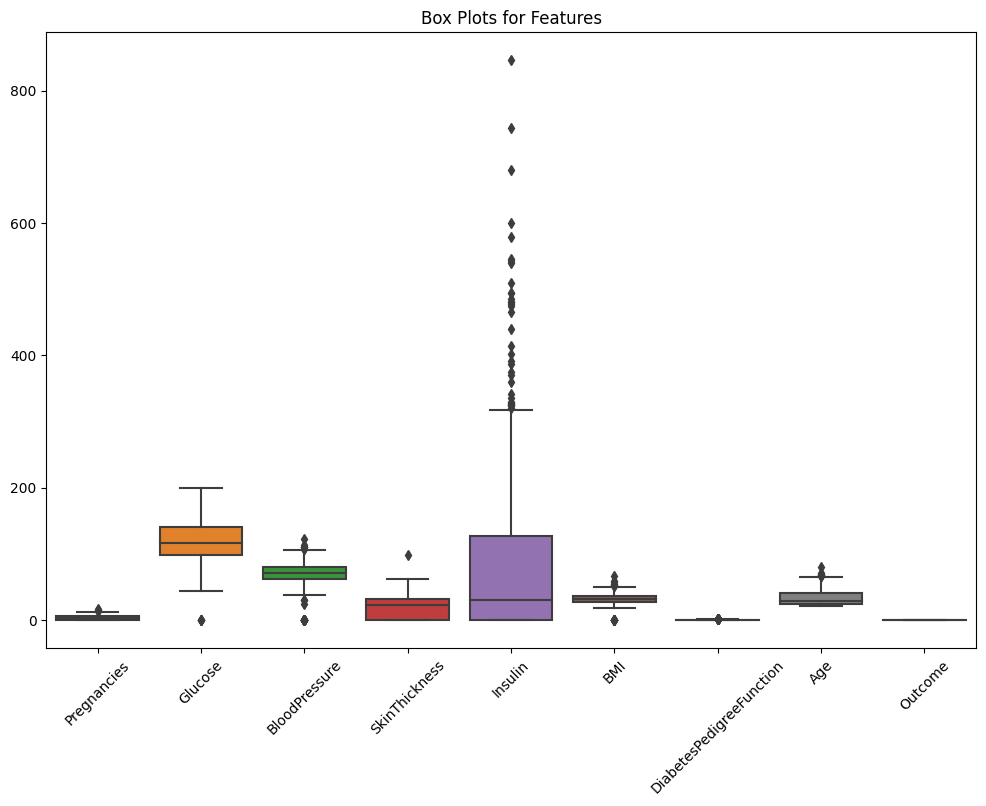

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box Plots for Features')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming you have already defined your features and target variable
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


##Decession Tree


Accuracy: 0.7467532467532467
Confusion Matrix:
[[75 24]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



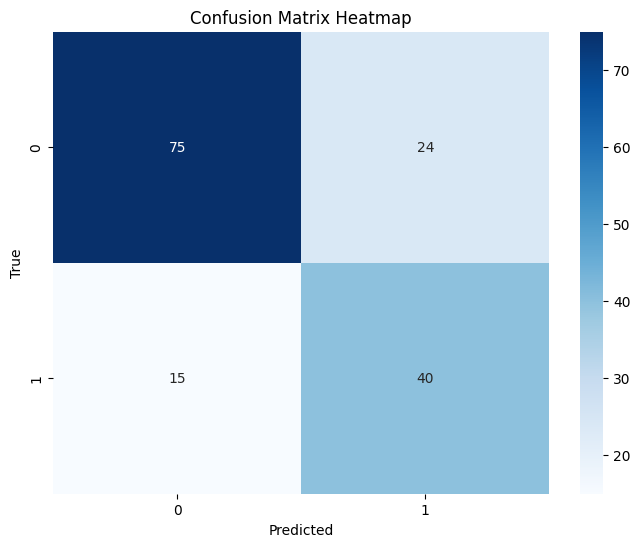

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have already defined your features and target variable
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


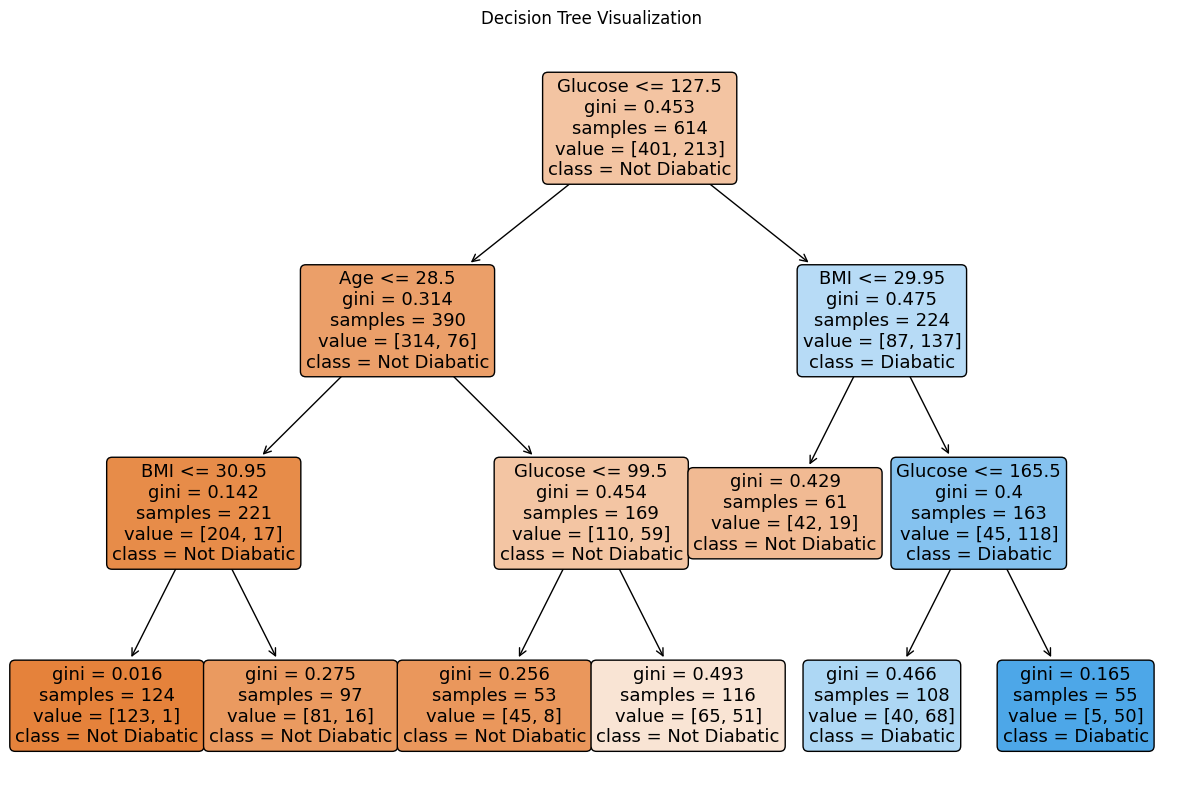

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have already defined your features and target variable
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42,min_samples_leaf=50,min_samples_split=150)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features.columns, class_names=['Not Diabatic', 'Diabatic'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [18]:
my_max_depht=[2,3,4,5,10]
cretireion=['gini','entrophy']
minsample=[2,5,10,15,20,25]
minleaf=[2,5,10,15,50,100]


In [19]:
model1= DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid=GridSearchCV(estimator=model1,cv=5,scoring='recall',
                  param_grid =dict(max_depth=my_max_depht,criterion=cretireion,
                                  min_samples_leaf=minleaf,min_samples_split=minsample))

In [22]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 50, 100],
                         'min_samples_split': [2, 5, 10, 15, 20, 25]},
             scoring='recall')

In [23]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [25]:
import numpy as np

In [26]:
np.round(grid.best_score_,2)*100

86.0

In [27]:
results=pd.DataFrame(grid.cv_results_)
results.to_csv("results3.csv")

In [28]:
p=grid.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.86      0.56      0.67        99
           1       0.51      0.84      0.63        55

    accuracy                           0.66       154
   macro avg       0.69      0.70      0.65       154
weighted avg       0.73      0.66      0.66       154



In [33]:
p

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [34]:
predcit=grid.predict_proba(X_test)
np.round(predcit,3)

array([[0.414, 0.586],
       [0.729, 0.271],
       [0.985, 0.015],
       [0.946, 0.054],
       [0.26 , 0.74 ],
       [0.414, 0.586],
       [0.985, 0.015],
       [0.414, 0.586],
       [0.26 , 0.74 ],
       [0.26 , 0.74 ],
       [0.414, 0.586],
       [0.071, 0.929],
       [0.26 , 0.74 ],
       [0.414, 0.586],
       [0.985, 0.015],
       [0.729, 0.271],
       [0.729, 0.271],
       [0.985, 0.015],
       [0.313, 0.687],
       [0.26 , 0.74 ],
       [0.414, 0.586],
       [0.414, 0.586],
       [0.414, 0.586],
       [0.729, 0.271],
       [0.26 , 0.74 ],
       [0.071, 0.929],
       [0.985, 0.015],
       [0.985, 0.015],
       [0.729, 0.271],
       [0.414, 0.586],
       [0.071, 0.929],
       [0.26 , 0.74 ],
       [0.071, 0.929],
       [0.071, 0.929],
       [0.414, 0.586],
       [0.26 , 0.74 ],
       [0.071, 0.929],
       [0.414, 0.586],
       [0.414, 0.586],
       [0.26 , 0.74 ],
       [0.985, 0.015],
       [0.794, 0.206],
       [0.414, 0.586],
       [0.4

In [35]:
pec=grid.predict_proba(X_test)
testcase=np.round(pec[0],3)
testcase

array([0.414, 0.586])

In [36]:
pec[0,1]

0.5864494818326234

In [37]:
testcase_p=testcase[1]>=0.50
testcase_p

True

In [40]:
new=pec[:,1]>=0.15

In [41]:
pnew=grid.predict(X_test)
print(metrics.classification_report(y_test,new)) #did al this for improving percentage of recalll for 1

              precision    recall  f1-score   support

           0       0.94      0.32      0.48        99
           1       0.44      0.96      0.61        55

    accuracy                           0.55       154
   macro avg       0.69      0.64      0.54       154
weighted avg       0.76      0.55      0.53       154



##Random Forest

Accuracy: 0.7207792207792207
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



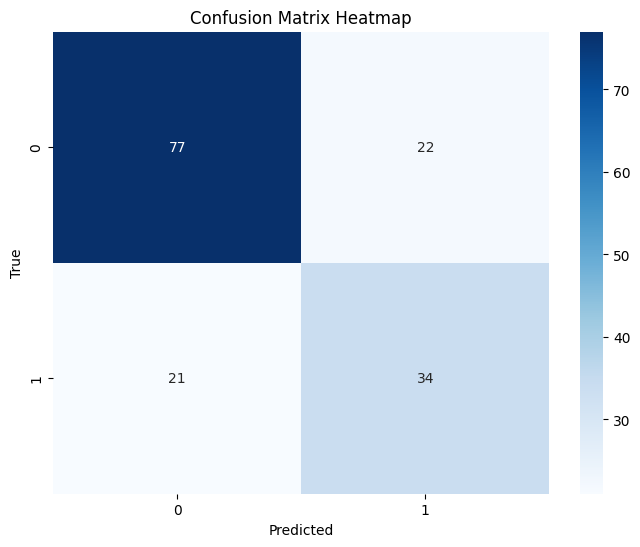

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined your features and target variable
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [2, 5, 10, 15, 50, 100]
}

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance with k-fold cross-validation (e.g., k=5)
grid = GridSearchCV(estimator=model, cv=5, scoring='recall', param_grid=param_grid)

# Fit the GridSearchCV to your data
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 50, 100],
                         'min_samples_split': [2, 5, 10, 15, 20, 25],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

In [50]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 50}

In [51]:
np.round(grid.best_score_,2)*100

62.0

In [53]:
pnew=grid.predict(X_test)
print(metrics.classification_report(y_test,pnew))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [55]:
pec=grid.predict_proba(X_test)
testcase=np.round(pec[0],3)
testcase

array([0.561, 0.439])

In [56]:
pec[0,1]

0.4388124815341257

In [57]:
testcase_p=testcase[1]>=0.4
testcase_p

True

In [61]:
new=pec[:,1]>=0.20 ## we lower this for better recall score

In [62]:
pnew=grid.predict(X_test)
print(metrics.classification_report(y_test,new)) #did al this for improving percentage of recalll for 1

              precision    recall  f1-score   support

           0       0.92      0.44      0.60        99
           1       0.48      0.93      0.63        55

    accuracy                           0.62       154
   macro avg       0.70      0.69      0.62       154
weighted avg       0.76      0.62      0.61       154

